# Flight Fare Prediction(Regression Model)
# Steps:
##### 1. Importing the libraries.
##### 2. Importing Dataset.
##### 3. Training Data Preprocessing.
##### 4. Exploratory Data Analysis.
##### 5. Handling Categorical Data.
##### 6. Testing Data Preprocessing.
##### 7. Feature Selection.
##### 8. Model Creation and Evaluation.
##### 9. Front End Creation.
##### 10. Deployment

# Importing Required Libraries.
##### 1. Numpy : For calculations and numerical process.
##### 2. Pandas : Data analysis and manipulation.
##### 3. Matplotlib : Data visualization.
##### 4. Seaborn :Data visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Datasets
##### 1. Here, the data is stored in the file with .xlsx extension. So, we have to use read_excel() function to import data.
##### 2. Now, we explore the dataset and then hunt for missing values an handle them.
##### 3. If null values are present, then we impute the missing values with either mean, median or mode.
##### 4. For statistical analysis , we use the describe() function.

In [2]:
#Importing Dataset
training_data = pd.read_excel(r"F:\Data_Train.xlsx")

In [3]:
#Printing First five rows of the Training Data
training_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Traing Data Preprocessing.

In [4]:
#Checking the Size of the Dataset
print("Number of Rows in the Dataset :", training_data.shape[0])
print("Number of Columns in the Dataset :", training_data.shape[1])

Number of Rows in the Dataset : 10683
Number of Columns in the Dataset : 11


In [5]:
#Information of Data
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
#Checking for the missing values
training_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
#Handling the missing values
training_data.dropna(inplace = True)
training_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
#Statistical Analysis
training_data.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Exploratory Data Analysis
#### 1. From above description, we get to know that "Date_of_Journey", "Duration", "Dep_time" and "Arrival_time" are of "object" type. So, we have to convert them into datetime object for using them for prediction of fare price.
#### 2. For converting we use pd.to_datetime() function of the pandas.

### Converting Date_of_Journey

In [9]:
#Changing Data type of "Date_of_Journey" column into datetime
training_data["Date_of_Journey"] = pd.to_datetime(training_data.Date_of_Journey, format = "%d/%m/%Y")
training_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
#Adding new columns( Journey_day, Journey_month, Journey_year)

#extracting day from "Date_of_Journey"
training_data["Journey_day"] = training_data["Date_of_Journey"].dt.day

#extracting month from "Date_of_Journey"
training_data["Journey_month"] = training_data["Date_of_Journey"].dt.month

# #extracting year from "Date_of_Journey"
# training_data["Journey_year"] = training_data["Date_of_Journey"].dt.year

training_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [11]:
#Droping the 'Date_of_Journey' column because it is of no use
training_data.drop(['Date_of_Journey'], axis = 1, inplace = True)

training_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


## Converting Arrival_time to Dep_time

In [12]:
#Changing Data type of "Arrival_Time" column into datetime
training_data["Arrival_Time"] = pd.to_datetime(training_data.Arrival_Time)

training_data.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_13500\2023316302.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_data["Arrival_Time"] = pd.to_datetime(training_data.Arrival_Time)


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2023-04-16 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,2023-04-16 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,2023-04-16 21:35:00,4h 45m,1 stop,No info,13302,1,3


In [13]:
#Adding new columns (Arrival_hour, Arrival_min)

#extracting Arrival hour
training_data["Arrival_hour"] = training_data["Arrival_Time"].dt.hour

#extracting Arrival hour
training_data["Arrival_min"] = training_data["Arrival_Time"].dt.minute

training_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2023-04-16 13:15:00,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,2023-04-16 23:30:00,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,2023-04-16 21:35:00,4h 45m,1 stop,No info,13302,1,3,21,35


In [14]:
#Droping Arrival_Time Column because it is of no use
training_data.drop(['Arrival_Time'], axis = 1, inplace = True)

training_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,21,35


In [15]:
#Changing Data type of "Dep_Time" column into datetime
training_data["Dep_Time"] = pd.to_datetime(training_data.Dep_Time)
training_data.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_13500\4979156.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_data["Dep_Time"] = pd.to_datetime(training_data.Dep_Time)


,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-04-16 22:20:00,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-04-16 05:50:00,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-04-16 09:25:00,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-04-16 18:05:00,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-04-16 16:50:00,4h 45m,1 stop,No info,13302,1,3,21,35


In [16]:
#Adding new columns (Dep_hour, Dep_min)

#Extracting Departure Hour
training_data["Dep_hour"] = training_data["Dep_Time"].dt.hour

#Extracting Departure Minute
training_data["Dep_min"] = training_data["Dep_Time"].dt.minute

training_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-04-16 22:20:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-04-16 05:50:00,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-04-16 09:25:00,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-04-16 18:05:00,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-04-16 16:50:00,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [17]:
#Droping Dep_Time Column because it is of no use
training_data.drop(["Dep_Time"], axis = 1, inplace = True)
training_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


### Converting Duration

In [18]:
#Converting Duration into Duration in minutes
duration =  list(training_data['Duration'])
minutes = []

for i in range (len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            minutes.append( int(duration[i].split(sep = 'h')[0]) * 60) 
        else: 
            minutes.append(int(duration[i].split(sep = 'm')[0]))
    else:       
        minutes.append(int(duration[i].split(sep = 'h')[0]) * 60 + int(duration[i].split(sep =  'm')[0].split()[-1]))
        
training_data["Duration_min"] =  minutes
training_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50,285


In [19]:
#Droping Duration Column because it is of no use
training_data.drop("Duration", axis = 1, inplace = True)
training_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,35,16,50,285


### Handling Categorical Variables

##### Label Encoder -> We use these when we have Ordinal Data in our Dataset.
##### OneHot Encoder -> We use these when we have Nominal  Data in our Dataset.

In [20]:
#Checking Distribution of Source column
training_data['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

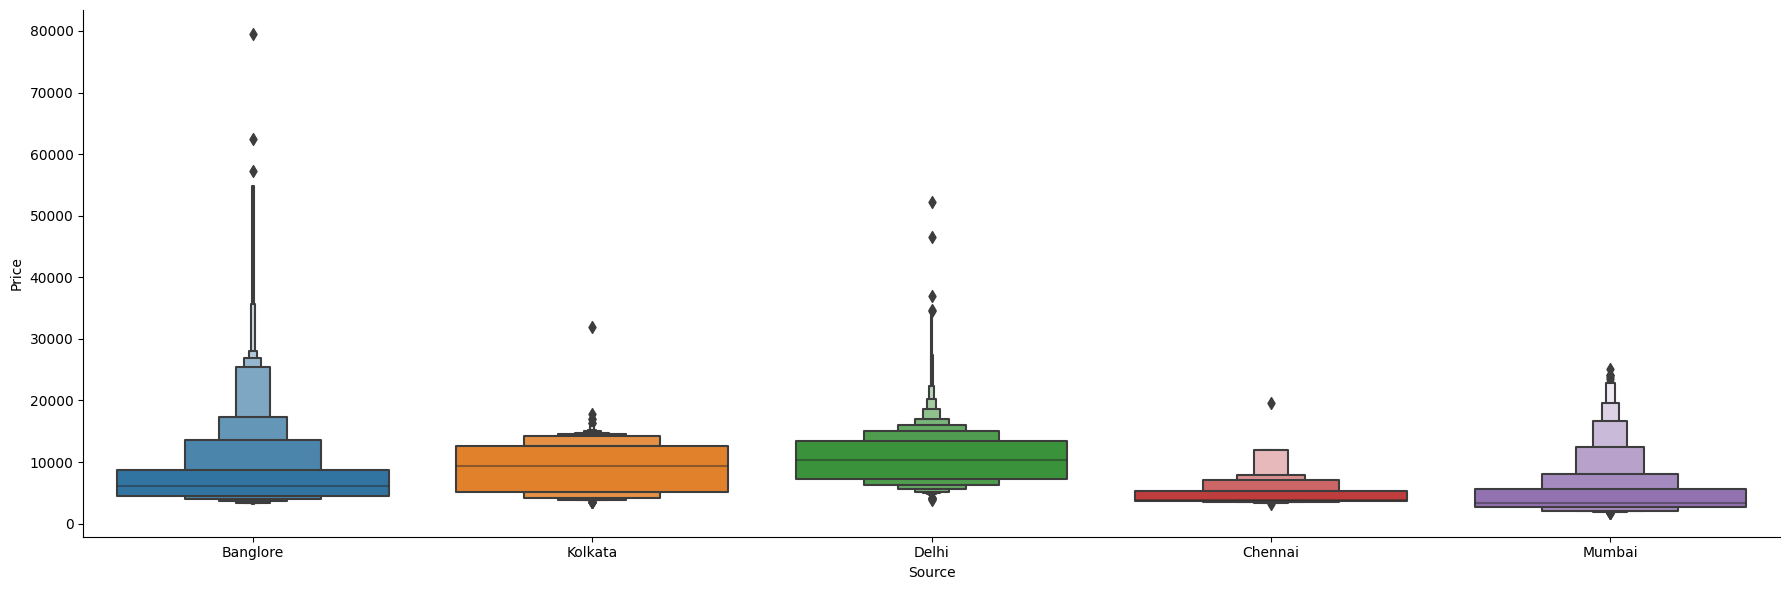

In [21]:
#Visualizing the Source vs Price
sns.catplot(x = "Source", y = "Price", data = training_data, kind = 'boxen', aspect = 3, height = 6)

In [22]:
#Extracting Source column from Dataframe and encode it into OneHot Encoding
source = training_data['Source']
source = pd.get_dummies(source , drop_first = True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [23]:
#Checking Distribution of Destination column
training_data['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

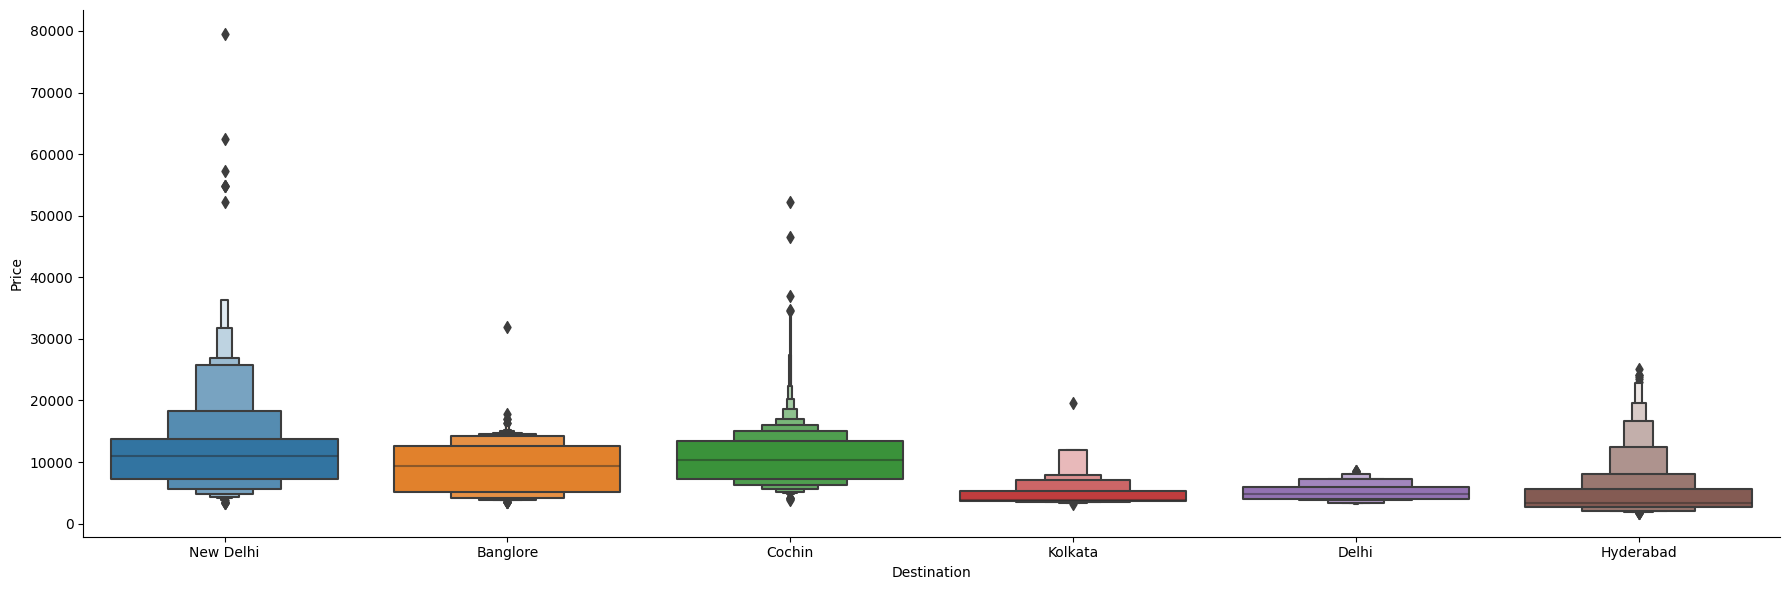

In [24]:
#Visualizing the Destination vs Price
sns.catplot(x = "Destination", y = "Price", data = training_data, kind = 'boxen', aspect = 3, height = 6)

In [25]:
#Extracting Destination column from Dataframe and encode it into OneHot Encoding
destination = training_data['Destination']
destination = pd.get_dummies(destination , drop_first = True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [26]:
#Checking Distribution of Airline column
training_data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

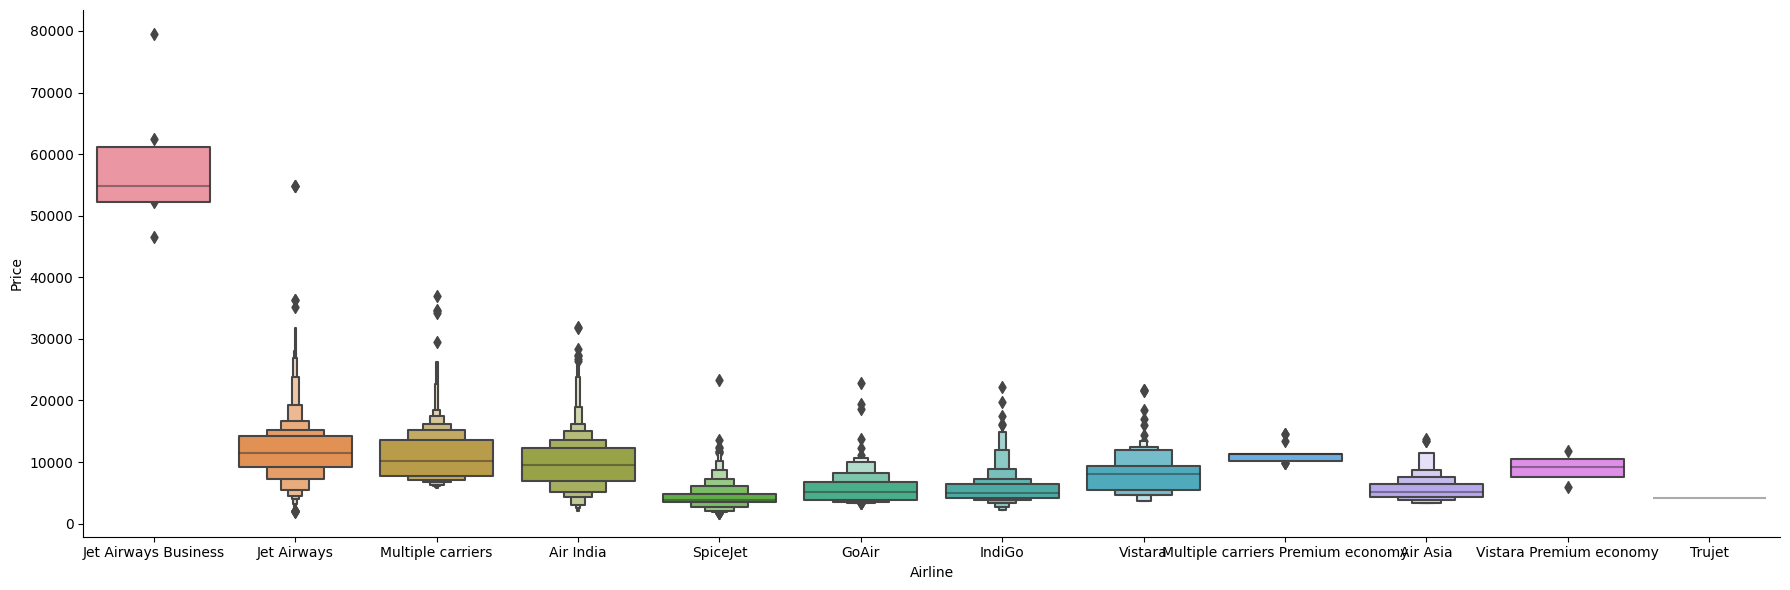

In [27]:
#Visualizing the Airline vs Price
sns.catplot(x = "Airline", y = "Price", data = training_data.sort_values("Price", ascending = False), kind = 'boxen', aspect = 3, height = 6)

In [28]:
#Extracting Airline column from Dataframe and encode it into OneHot Encoding
airlines = training_data['Airline']
airlines = pd.get_dummies(airlines , drop_first = True)
airlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [29]:
#Checking Relation between Route and Total_Stops
training_data[["Route", "Total_Stops"]].head(10)

,Route,Total_Stops
0,BLR → DEL,non-stop
1,CCU → IXR → BBI → BLR,2 stops
2,DEL → LKO → BOM → COK,2 stops
3,CCU → NAG → BLR,1 stop
4,BLR → NAG → DEL,1 stop
5,CCU → BLR,non-stop
6,BLR → BOM → DEL,1 stop
7,BLR → BOM → DEL,1 stop
8,BLR → BOM → DEL,1 stop
9,DEL → BOM → COK,1 stop


### Here, The "Route" and "Total_stops" columns are correlated with each other. It means the "Route" shows us the Source, Intermediate stops and Destination and "Total_stops" is number of intermediate stops. So, in regression we have to remove these correlated columns.

In [30]:
#Droping Route Column to remove Correlation
training_data.drop('Route', axis = 1, inplace = True)
training_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,21,35,16,50,285


In [31]:
#Checking Distribution of Total_Stops column
training_data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [32]:
#Replacing String values with the integer for calculations
stops =  {'Total_Stops' : {'non-stop' : 0, '1 stop' : 1, '2 stops' :  2, '3 stops':  3, '4 stops' : 4}}
training_data.replace(stops, inplace = True)
training_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,21,35,16,50,285


In [33]:
#Checking Distribution of Additional_Info column
training_data['Additional_Info'].value_counts(normalize = True)

Additional_Info
No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
1 Short layover                 0.000094
Red-eye flight                  0.000094
2 Long layover                  0.000094
Name: proportion, dtype: float64

### Here we see that approximately 80% of the rows in the "Additional_Info" column is filled with "no_info"  which is dominating and lead to bad predictions. So, we have to drop this column.

In [34]:
#Droping Additional_Info Column
training_data.drop('Additional_Info', axis = 1, inplace = True)
training_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,50,285


In [35]:
#Merging all the dataframe 
processed_data = pd.concat([training_data, source, destination, airlines], axis = 1)
processed_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,...,False,True,False,False,False,False,False,False,False,False
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,...,False,False,False,False,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,...,False,False,True,False,False,False,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,...,False,True,False,False,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,...,False,True,False,False,False,False,False,False,False,False


In [36]:
processed_data.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace =True)
processed_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min,Chennai,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,3897,24,3,1,10,22,20,170,False,...,False,True,False,False,False,False,False,False,False,False
1,2,7662,1,5,13,15,5,50,445,False,...,False,False,False,False,False,False,False,False,False,False
2,2,13882,9,6,4,25,9,25,1140,False,...,False,False,True,False,False,False,False,False,False,False
3,1,6218,12,5,23,30,18,5,325,False,...,False,True,False,False,False,False,False,False,False,False
4,1,13302,1,3,21,35,16,50,285,False,...,False,True,False,False,False,False,False,False,False,False


In [37]:
processed_data.shape
processed_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min', 'Duration_min', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy'],
      dtype='object')

### Now our processed data contains 10682 rows and 29 columns.


# Test Data Preprocessing.

In [38]:
#Importing Test Dataset
test_data = pd.read_excel(r"F:\Test_set.xlsx")

In [39]:
#Printing First five rows of the Training Data
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [40]:
#Checking the Size of the Test Dataset
print("Number of Rows in the Test Dataset :", test_data.shape[0])
print("Number of Columns in the Test Dataset :", test_data.shape[1])

Number of Rows in the Test Dataset : 2671
Number of Columns in the Test Dataset : 10


In [41]:
#Information of Data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [42]:
#Checking for missing values in the Test Dataset
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

### Converting Date_of_Journey

In [43]:
#Changing Data type of "Date_of_Journey" column into datetime
test_data["Date_of_Journey"] = pd.to_datetime(test_data.Date_of_Journey, format = "%d/%m/%Y")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [44]:
#Adding new columns( Journey_day, Journey_month, Journey_year)

#extracting day from date
test_data["Journey_day"] = test_data["Date_of_Journey"].dt.day

#extracting month from date
test_data["Journey_month"] = test_data["Date_of_Journey"].dt.month
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [45]:
#Droping the 'Date_of_Journey' column because it is of no use
test_data.drop(['Date_of_Journey'], axis = 1, inplace = True)

test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


### Converting Arrival_Time and Dep_Time

In [46]:
#Converting Arrival_Time into datetime
test_data["Arrival_Time"] = pd.to_datetime(test_data.Arrival_Time)

test_data.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_13500\2082008534.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_Time"] = pd.to_datetime(test_data.Arrival_Time)


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,2023-06-07 04:25:00,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,2023-04-16 10:20:00,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,2023-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,2023-04-16 21:00:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,2023-06-25 02:45:00,2h 50m,non-stop,No info,24,6


In [47]:
#adding new columns (Arrival_hour, Arrival_min)

#extracting Arrival hour
test_data["Arrival_hour"] = test_data["Arrival_Time"].dt.hour

#extracting Arrival hour
test_data["Arrival_min"] = test_data["Arrival_Time"].dt.minute

test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,2023-06-07 04:25:00,10h 55m,1 stop,No info,6,6,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,2023-04-16 10:20:00,4h,1 stop,No info,12,5,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,2023-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,21,5,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,2023-04-16 21:00:00,13h,1 stop,No info,21,5,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,2023-06-25 02:45:00,2h 50m,non-stop,No info,24,6,2,45


In [48]:
#Droping Arrival_Time Column because it is of no use
test_data.drop(['Arrival_Time'], axis = 1, inplace = True)

test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,10h 55m,1 stop,No info,6,6,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,4h,1 stop,No info,12,5,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,23h 45m,1 stop,In-flight meal not included,21,5,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,13h,1 stop,No info,21,5,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,2h 50m,non-stop,No info,24,6,2,45


In [49]:
#Converting Dep_time to datetime 
test_data["Dep_Time"] = pd.to_datetime(test_data.Dep_Time)
test_data.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_13500\3728445947.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_Time"] = pd.to_datetime(test_data.Dep_Time)


,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2023-04-16 17:30:00,10h 55m,1 stop,No info,6,6,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,2023-04-16 06:20:00,4h,1 stop,No info,12,5,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2023-04-16 19:15:00,23h 45m,1 stop,In-flight meal not included,21,5,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,2023-04-16 08:00:00,13h,1 stop,No info,21,5,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2023-04-16 23:55:00,2h 50m,non-stop,No info,24,6,2,45


In [50]:
#Adding new columns (Dep_hour, Dep_min)

#extracting Arrival hour
test_data["Dep_hour"] = test_data["Dep_Time"].dt.hour

#extracting Arrival minute
test_data["Dep_min"] = test_data["Dep_Time"].dt.minute
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2023-04-16 17:30:00,10h 55m,1 stop,No info,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,2023-04-16 06:20:00,4h,1 stop,No info,12,5,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2023-04-16 19:15:00,23h 45m,1 stop,In-flight meal not included,21,5,19,0,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,2023-04-16 08:00:00,13h,1 stop,No info,21,5,21,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2023-04-16 23:55:00,2h 50m,non-stop,No info,24,6,2,45,23,55


In [51]:
#Droping Dep_Time Column because it is of no use
test_data.drop(["Dep_Time"], axis = 1, inplace = True)
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,0,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,21,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2,45,23,55


### Converting Duration

In [52]:
#Converting Duration into Duration in minutes
duration =  list(test_data['Duration'])
minutes = []

for i in range (len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            minutes.append( int(duration[i].split(sep = 'h')[0]) * 60) 
        else: 
            minutes.append(int(duration[i].split(sep = 'm')[0]))
    else:       
        minutes.append(int(duration[i].split(sep = 'h')[0]) * 60 + int(duration[i].split(sep =  'm')[0].split()[-1]))

test_data["Duration_min"] =  minutes
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,21,0,8,0,780
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2,45,23,55,170


In [53]:
test_data.drop("Duration", axis = 1, inplace = True)
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,21,0,8,0,780
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2,45,23,55,170


In [54]:
test_data['Additional_Info'].value_counts()

Additional_Info
No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: count, dtype: int64

# Handling Categorical Variables

######  We use Label Encoder when we have Ordinal Data. Since, we have only Nominal Data in our Dataset, we will use one hot encoder to handle categorical columns.

In [55]:
#Converting Source 
test_data['Source'].value_counts()

Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: count, dtype: int64

In [56]:
source = test_data['Source']
source = pd.get_dummies(source , drop_first = True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,False,True,False,False
1,False,False,True,False
2,False,True,False,False
3,False,True,False,False
4,False,False,False,False


In [57]:
test_data['Destination'].value_counts()

Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: count, dtype: int64

In [58]:
destination = test_data['Destination']
destination = pd.get_dummies(destination , drop_first = True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,True,False,False,False,False
1,False,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,False,True,False,False,False


In [59]:
test_data['Airline'].value_counts()

Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: count, dtype: int64

In [60]:
airlines = test_data['Airline']
airlines = pd.get_dummies(airlines , drop_first = True)
airlines["Trujet"] = 0
airlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Trujet
0,False,False,False,True,False,False,False,False,False,False,0
1,False,False,True,False,False,False,False,False,False,False,0
2,False,False,False,True,False,False,False,False,False,False,0
3,False,False,False,False,False,True,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,0


##### The columns "Route" and "Total_Stops" are correlated. In regression problem we have to remove the correlated features. Thus, we drop the route column.

In [61]:
test_data.drop('Route', axis = 1, inplace = True)
test_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,1 stop,No info,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,1 stop,No info,12,5,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,21,5,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,1 stop,No info,21,5,21,0,8,0,780
4,Air Asia,Banglore,Delhi,non-stop,No info,24,6,2,45,23,55,170


In [62]:
test_data['Total_Stops'].value_counts()

Total_Stops
1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: count, dtype: int64

In [63]:
stops =  {'Total_Stops' : {'non-stop' : 0, '1 stop' : 1, '2 stops' :  2, '3 stops':  3, '4 stops' : 4}}
test_data.replace(stops, inplace = True)
test_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,1,No info,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,1,No info,12,5,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,1,In-flight meal not included,21,5,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,1,No info,21,5,21,0,8,0,780
4,Air Asia,Banglore,Delhi,0,No info,24,6,2,45,23,55,170


In [64]:
test_data['Additional_Info'].value_counts(normalize = True)

Additional_Info
No info                         0.804193
In-flight meal not included     0.166230
No check-in baggage included    0.028454
1 Long layover                  0.000374
Business class                  0.000374
Change airports                 0.000374
Name: proportion, dtype: float64

##### We cn see that approximately 80% of the data in the column "Additional_Info" has the value "no_info".The data in this column is not randomized and causes a problem in our prediction.Thus, we drop this column.

In [65]:
test_data.drop('Additional_Info', axis = 1, inplace = True)
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,1,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,1,12,5,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,1,21,5,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,1,21,5,21,0,8,0,780
4,Air Asia,Banglore,Delhi,0,24,6,2,45,23,55,170


In [66]:
processed_test = pd.concat([test_data, source, destination, airlines], axis = 1)
processed_test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Trujet
0,Jet Airways,Delhi,Cochin,1,6,6,4,25,17,30,...,False,False,True,False,False,False,False,False,False,0
1,IndiGo,Kolkata,Banglore,1,12,5,10,20,6,20,...,False,True,False,False,False,False,False,False,False,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,0,19,15,...,False,False,True,False,False,False,False,False,False,0
3,Multiple carriers,Delhi,Cochin,1,21,5,21,0,8,0,...,False,False,False,False,True,False,False,False,False,0
4,Air Asia,Banglore,Delhi,0,24,6,2,45,23,55,...,False,False,False,False,False,False,False,False,False,0


In [67]:
processed_test.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace =True)
processed_test.head()

,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min,Chennai,Delhi,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Trujet
0,1,6,6,4,25,17,30,655,False,True,...,False,False,True,False,False,False,False,False,False,0
1,1,12,5,10,20,6,20,240,False,False,...,False,True,False,False,False,False,False,False,False,0
2,1,21,5,19,0,19,15,1425,False,True,...,False,False,True,False,False,False,False,False,False,0
3,1,21,5,21,0,8,0,780,False,True,...,False,False,False,False,True,False,False,False,False,0
4,0,24,6,2,45,23,55,170,False,False,...,False,False,False,False,False,False,False,False,False,0


In [68]:
processed_test.shape

(2671, 28)

# Feature Selection

##### Here, we find out the best features for training the model and also see at what extent they contribute to our fare prediction. We do these by : 
##### 1. Heatmap
##### 2. feature_importances_

In [69]:
#Checking for number of rows and columns
processed_data.shape

(10682, 29)

In [70]:
#Checking for Column names
processed_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min', 'Duration_min', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy'],
      dtype='object')

In [71]:
#Extracting X = Independent/Predictor Variable and Y = Dependent/Target Variable
X = processed_data.drop("Price", axis = 1).values
Y = processed_data["Price"].values

print("X =", X)
print()
print("Y =", Y)

X = [[0 24 3 ... False False False]
 [2 1 5 ... False False False]
 [2 9 6 ... False False False]
 ...
 [0 27 4 ... False False False]
 [0 1 3 ... False True False]
 [2 9 5 ... False False False]]

Y = [ 3897  7662 13882 ...  7229 12648 11753]


In [72]:
#Creating Heatmap to analyze relation between features
plt.figure(figsize = (18,18))
sns.heatmap(training_data.corr(), annot = True, cmap = "rainbow")
plt.show()

ValueError: could not convert string to float: 'IndiGo'

<Figure size 1800x1800 with 0 Axes>

In [ ]:
#Extracting important features using ExtraTreesRegresser
from sklearn.ensemble import ExtraTreesRegressor

imp_features = ExtraTreesRegressor()
imp_features.fit(X, Y)

In [ ]:
#Displaying importance features proportions
print(imp_features.feature_importances_)

In [ ]:
#Visualizing the feature_importances_
plt.figure(figsize = (12, 8))
columns = processed_data.drop("Price", axis = 1).columns
fseries = pd.Series(imp_features.feature_importances_, index = columns)
fseries.nlargest(20).plot(kind = "barh")

# Fitting the model using

##### 1. Split the data into train and test so as to predict w.r.t. "X_test".
##### 2. Import the model(which suits the data most or gives better results).
##### 3. Fit training data into it.
##### 4. Predict w.r.t. "X_test"(Compare with "Y_test").
##### 5. In regression models checkn RMSE score.
##### 6. Plot final graphs.

In [ ]:
#Splitting the processed_data into Train and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print("Training Set \nX =", X_train.shape, "\nY =", Y_train.shape)
print()
print("Test Set \nX =", X_test.shape, "\nY =", Y_test.shape)

In [ ]:
#Importing the model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

### Creating and fitting model using Linear Regression

In [ ]:
#Creating and Fitting the Model
reg_model = LinearRegression()
reg_model.fit(X_train, Y_train)
# Finding the coefficient and intercept for plotting the regression line
coefficients = pd.Series(reg_model.coef_, index = columns)
intercept = reg_model.intercept_

print("Intercept -->", intercept)
print("\nCoefficients -->\n\n", coefficients)

In [ ]:
#Predicting the values of the target variable for test set
Y_pred = reg_model.predict(X_test)
print("Predicted values for the Test Set\n", Y_pred[:100])

In [ ]:
#Checking coefficient of determination for Training Set
reg_model.score(X_train, Y_train)

In [ ]:
#Checking coefficient of determination for Test Set
reg_model.score(X_test, Y_test)

In [ ]:
#Visualizing the distribution of difference in the actual value and predicted value
plt.figure(figsize = (12, 8))
sns.histplot(Y_test - Y_pred, kde = True)
plt.xlabel("Y_Test - Y_pred")
plt.ylabel("Count")

In [ ]:
#Importing and Evaluating the predictions using metrices
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae =  mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2score = r2_score(Y_test, Y_pred)

print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

### Creating and fitting model using Random Forest Regression

In [ ]:
#Creating and Fitting the Model
rfm_model = RandomForestRegressor()
rfm_model.fit(X_train, Y_train)

Y_pred = rfm_model.predict(X_test)
print("Predicted values for the Test Set\n", Y_pred[:100])

In [ ]:
#Visualizing the distribution of difference in the actual value and predicted value
plt.figure(figsize = (12, 8))
sns.histplot(Y_test - Y_pred, kde = True)
plt.xlabel("Y_Test - Y_pred")
plt.ylabel("Count")

In [ ]:
mae =  mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2score = r2_score(Y_test, Y_pred)

print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

### Creating and fitting model using Decision Tree Regressor

In [ ]:
#Creating and Fitting the Model
des_model = DecisionTreeRegressor()
des_model.fit(X_train, Y_train)

In [ ]:
Y_pred = des_model.predict(X_test)
print("Predicted values for the Test Set\n", Y_pred[:100])

In [ ]:
#Visualizing the distribution of difference in the actual value and predicted value
plt.figure(figsize = (12, 8))
sns.histplot(Y_test - Y_pred, kde = True)
plt.xlabel("Y_Test - Y_pred")
plt.ylabel("Count")

In [ ]:
mae =  mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2score = r2_score(Y_test, Y_pred)

print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

# Conclusion

##### 1. Three models has been trained, namely Multiple Linear Regression, Random Forest Regression and Decision Tree Regression repectively.
##### 2. Among the three, the least RMSE score and highest R2_Score was seen for Random Forest Regression.
##### 3. Therefore, the best model for prediction is Random Forest Regression

# Save the model to reuse it again.

In [ ]:
import pickle

#Creating a file to store the model
file = open("fare_predict.pkl", 'wb')
            
#Dumping model into the file
pickle.dump(rfm_model, file)

In [ ]:
file = open("fare_predict.pkl", "rb")
model = pickle.load(file)

In [ ]:
Y_pred = model.predict(processed_test.values)